#### NOTEARS Bayesian

##### Based on https://github.com/jmoss20/notears/tree/master

In [30]:
import numpy as np
import pandas as pd
import notears

import scipy
import networkx as nx

import matplotlib.pyplot as plt

In [4]:
memory = pd.read_pickle('organized_training_memory.pkl')

In [5]:
memory

,cart_position,cart_velocity,pole_angle,pole_angular_velocity,action,reward,new_cart_position,new_cart_velocity,new_pole_angle,new_pole_angular_velocity
0,0.000133,0.044334,-0.040978,-0.013006,0,1.0,0.001020,-0.150177,-0.041238,0.266472
1,0.001020,-0.150177,-0.041238,0.266472,0,1.0,-0.001984,-0.344687,-0.035909,0.545868
2,-0.001984,-0.344687,-0.035909,0.545868,0,1.0,-0.008877,-0.539287,-0.024991,0.827024
3,-0.008877,-0.539287,-0.024991,0.827024,0,1.0,-0.019663,-0.734058,-0.008451,1.111744
4,-0.019663,-0.734058,-0.008451,1.111744,0,1.0,-0.034344,-0.929068,0.013784,1.401764
...,...,...,...,...,...,...,...,...,...,...
10008,2.238958,1.797743,0.148956,0.326994,1,1.0,2.274913,1.990466,0.155496,0.084743
10009,2.274913,1.990466,0.155496,0.084743,1,1.0,2.314722,2.183056,0.157191,-0.155126
10010,2.314722,2.183056,0.157191,-0.155126,0,1.0,2.358383,1.986074,0.154089,0.182729
10011,2.358383,1.986074,0.154089,0.182729,1,1.0,2.398105,2.178694,0.157743,-0.057655


In [71]:
memory.to_csv('memory.csv', index=False)

In [72]:
df = pd.read_csv('memory.csv')

In [8]:
memory_lst = memory.values.tolist()

10013

In [89]:
output_dict = notears.run(notears.notears_standard, memory_lst, notears.loss.least_squares_loss, 
                          notears.loss.least_squares_loss_grad, e=1e-8, verbose=False)

In [90]:
print('Acyclicity loss: {}'.format(output_dict['h']))
print('Least squares loss: {}'.format(output_dict['loss']))

Acyclicity loss: 5.1641819709402625e-09
Least squares loss: 0.2551686409221628


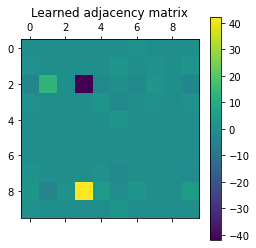

In [91]:
plt.matshow(output_dict['W'])
plt.title("Learned adjacency matrix")
plt.colorbar();

In [92]:
output_dict['W']

array([[ 4.29187860e-06,  4.36299430e-05,  2.67617401e-08,
        -6.33694942e-07, -1.29224593e-01, -2.05191372e-03,
         9.72521349e-01,  1.54303318e-07,  3.97536812e-08,
         1.16619409e-06],
       [ 4.23844453e-01,  2.11909780e-05, -7.10478772e-09,
        -2.01956760e-06, -1.46374433e-01,  1.89276966e+00,
         1.69256895e-02,  9.36895559e-01,  8.64626010e-09,
         1.42916656e+00],
       [-3.85126826e+00,  1.30951059e+01,  3.02909738e-09,
        -4.20457690e+01, -1.67211774e+00, -6.78185711e-02,
        -1.60184942e+00,  1.95322698e+00,  5.03920777e-07,
        -3.42449862e+00],
       [ 3.58167019e-01, -8.31894891e-01, -7.16589321e-11,
         1.16995216e-06,  1.60444621e+00, -2.13133757e+00,
        -3.53031836e-02,  1.07550120e-01,  3.06383122e-09,
         9.06939446e-01],
       [-7.54015635e-05,  2.19476787e-08, -1.75159502e-09,
         1.34113963e-07,  1.61337013e-06,  1.98793345e+00,
        -2.18693768e-06,  6.12997078e-08,  1.93013296e-09,
        -2.

In [93]:
W = pd.DataFrame(output_dict['W'])

In [94]:
W = W.round(5)

In [95]:
column_names = list(memory.columns.values)
W.columns = column_names

In [105]:
W.to_csv('W.csv', index=False)

In [97]:
node_names_dict = {index: column_name for index, column_name in enumerate(W.columns)}
node_names_dict

{0: 'cart_position',
 1: 'cart_velocity',
 2: 'pole_angle',
 3: 'pole_angular_velocity',
 4: 'action',
 5: 'reward',
 6: 'new_cart_position',
 7: 'new_cart_velocity',
 8: 'new_pole_angle',
 9: 'new_pole_angular_velocity'}

##### Draw DAG

In [98]:
acyclic_W = notears.utils.threshold_output(np.array(W.round(5)))

In [99]:
acyclic_W

array([[0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 0., 0., 1., 1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 1., 1., 0., 0., 0.]])

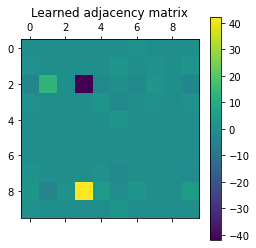

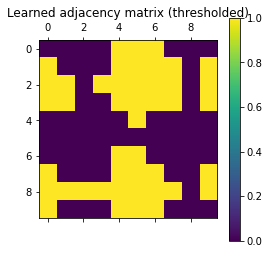

In [100]:
plt.matshow(output_dict['W'])
plt.title("Learned adjacency matrix")
plt.colorbar()

plt.matshow(acyclic_W)
plt.title("Learned adjacency matrix (thresholded)")
plt.colorbar()

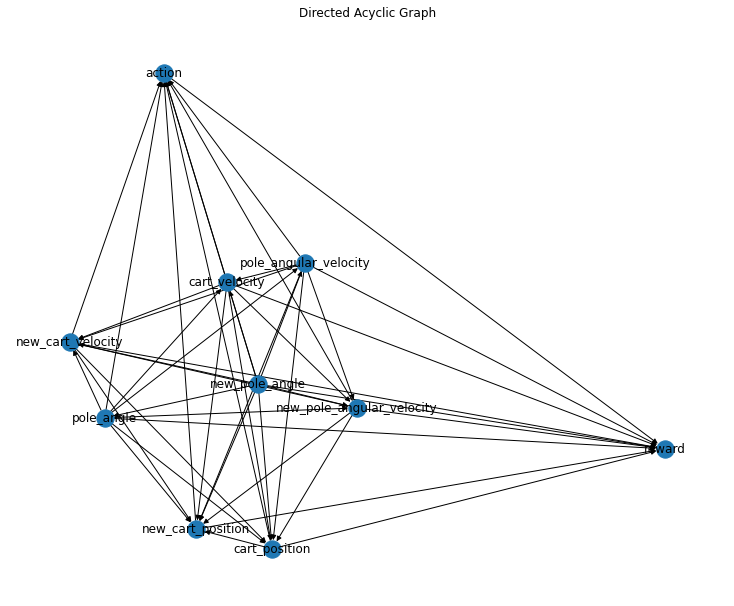

In [101]:
# Create a NetworkX DiGraph (Directed Graph)
G = nx.DiGraph(acyclic_W)

column_names = list(memory.columns.values)

for i, column_name in enumerate(column_names):
    G.add_node(i, label=column_name)

# Add edges based on the adjacency matrix
for i in range(len(acyclic_W)):
    for j in range(len(acyclic_W)):
        if acyclic_W[i][j] == 1:
            G.add_edge(i, j)

# Draw the DAG
pos = nx.spring_layout(G, seed=100)  # You can use different layout algorithms

# Set the figure size
plt.figure(figsize=(10, 8))  # Adjust the values as needed

labels = {node: data['label'] for node, data in G.nodes(data=True)}
nx.draw(G, pos, labels=labels, with_labels=True, arrows=True)

# Display the larger graph
plt.title("Directed Acyclic Graph")
plt.show()